In [89]:
import pandas as pd
import numpy as np
import math
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [90]:
#load in the data
AMZN = pd.read_csv('AMZN_return_factor.csv')
#1050 rows in total
#780 for train 52*15 

In [91]:
#get the raw train data
train_1 = AMZN.iloc[:780]
#drop useless columns
train_2 = train_p.drop(['Unnamed: 0_x','identifier_x','name_x','period_yyyymmdd_x','ticker','sub_ind_code_x',
                     'Unnamed: 0_y','identifier_y','name_y','period_yyyymmdd_y','fy1_3mchg','fy2_3mchg',
                     'sedol','cusip','sub_ind_code_y'],axis=1)
#get future returns data as y
train_y = train_2.iloc[:,:14]
train_x = pd.concat([train_2.iloc[:,0],train_2.iloc[:,15:]],axis=1)

In [92]:
#normalization 
train_x_mean = train_x.iloc[:,1:].apply(np.mean,axis=0)
train_x_sd = train_x.iloc[:,1:].apply(np.std,axis=0)

train_x_normal =  (train_x.iloc[:,1:]-train_x_mean)/train_x_sd

In [93]:
#define sequence length
seq_len = 8

In [94]:
#convert data form
def convert_data(raw,seq_len):
    raw_data = raw.as_matrix()
    dat = []
    
    for i in range(len(raw_data) - seq_len):
        dat.append(raw_data[i: i + seq_len])
    dat = np.array(dat)
    return dat
    

In [95]:
#final converted train set
train_x_final = convert_data(train_x_normal,seq_len)

/Users/JasonZhou/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
train_x_final.shape

(772, 8, 48)

In [97]:
#final y labels
#returns according to chosen timeframe
train_y_final = train_y.loc[seq_len:,'fut_1w_ret']

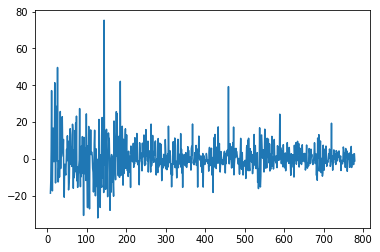

In [98]:
plt.plot(train_y_final)

In [99]:
#building model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [100]:
# Initialising the RNN
regressor = Sequential()

In [101]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_x_final.shape[1],train_x_final.shape[2])))
regressor.add(Dropout(0.2))

In [103]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [104]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(train_x_final, train__final, epochs = 100, batch_size = 32)

NameError: name 'X_train' is not defined